In [1]:
%pip install opendatasets --upgrade


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import opendatasets as od

od.download('https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?select=Train')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:  
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


100%|██████████| 612M/612M [00:07<00:00, 88.9MB/s]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [4]:
%pip install kaggle

In [8]:
import tensorflow as tf
from tensorflow import keras # Import the keras module
image_size = (32, 32)
batch_size = 128

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "/content/gtsrb-german-traffic-sign/Train",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    class_names=['1', '10', '11', '12', '13']
)

Found 10020 files belonging to 5 classes.
Using 8016 files for training.
Using 2004 files for validation.


In [9]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

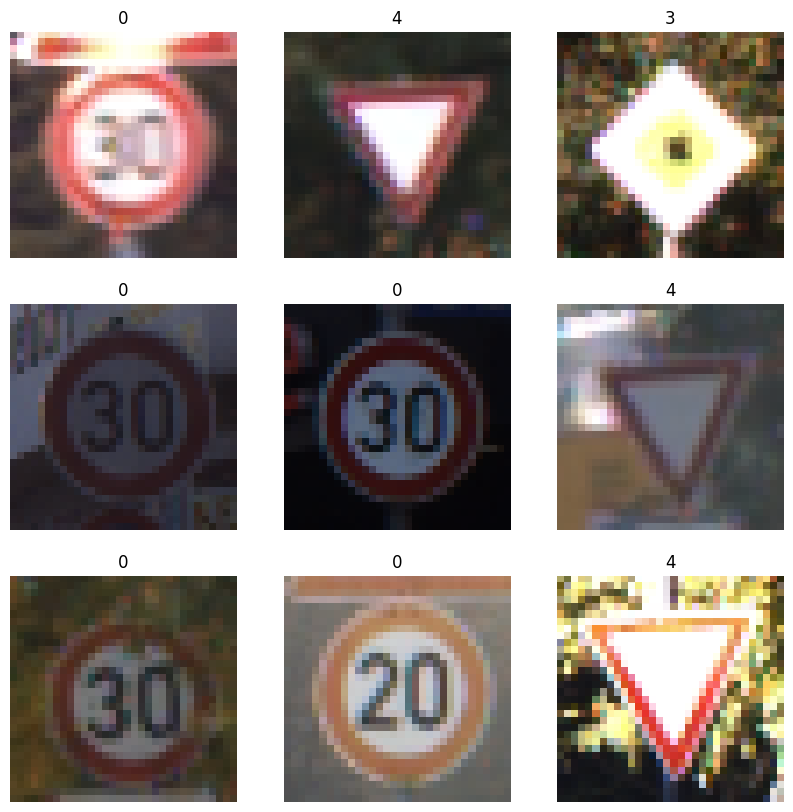

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [11]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

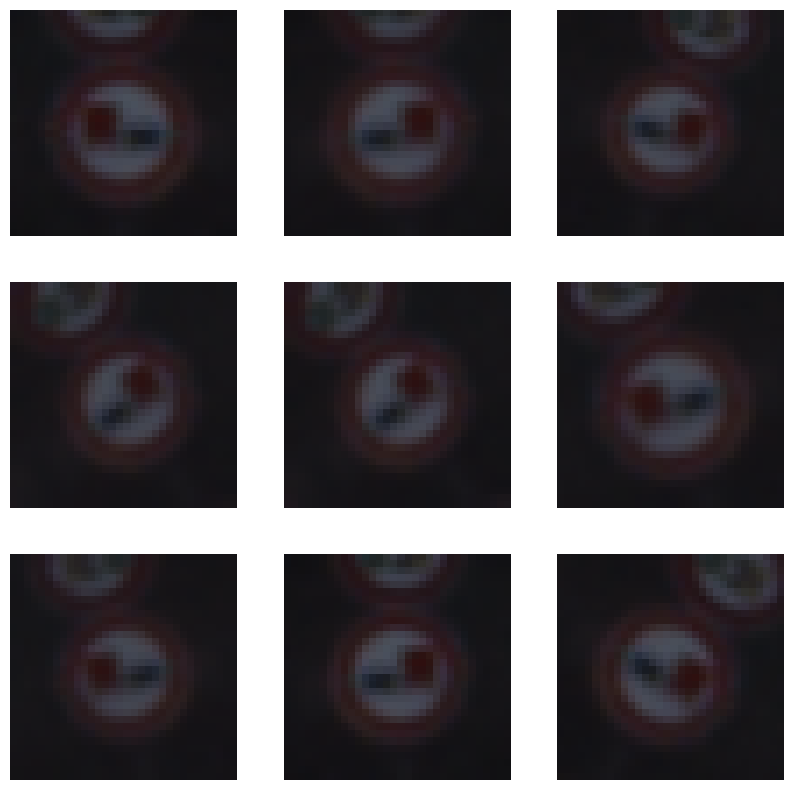

In [12]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy






In [14]:
len(train_ds)

63

In [15]:
model = Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(32, kernel_size=(4, 4), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(4, 4), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation="softmax")
  ])






In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 240,489 (939.41 KB)

 Trainable params: 240,489 (939.41 KB)

 Non-trainable params: 0 (0.00 B)

## Step 6: Train the Model
Train your model using the training data and validate it using the validation data.

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_ds, batch_size=32, epochs=20, validation_data=val_ds)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.9684 - loss: 0.1592 - val_accuracy: 0.9910 - val_loss: 0.0586
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 205ms/step - accuracy: 0.9880 - loss: 0.0580 - val_accuracy: 0.9885 - val_loss: 0.0444
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 204ms/step - accuracy: 0.9914 - loss: 0.0387 - val_accuracy: 0.9970 - val_loss: 0.0220
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - accuracy: 0.9943 - loss: 0.0269 - val_accuracy: 0.9980 - val_loss: 0.0207
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - accuracy: 0.9948 - loss: 0.0232 - val_accuracy: 0.9975 - val_loss: 0.0184
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - accuracy: 0.9975 - loss: 0.0135 - val_accuracy: 0.9980 - val_loss: 0.0132
Epoch 7/20


KeyboardInterrupt: 

## Step 7: Evaluate the Model
Evaluate the performance of your model using the validation set.

In [ ]:
model.evaluate(val_ds)

In [ ]:
#plotting graphs for accuracy
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# Assuming 'history' is the variable that stores the output of model.fit()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show() # Added to display the plot

In [ ]:
# Assuming 'model' is your defined Keras model and you have training and validation data
history = model.fit(train_ds, epochs=10, validation_data=val_ds) # Train the model and store history

# Now you can plot the training history
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Step 8: Save the Model
Finally, save your trained model for future use.

In [ ]:
model.save("model.h5")